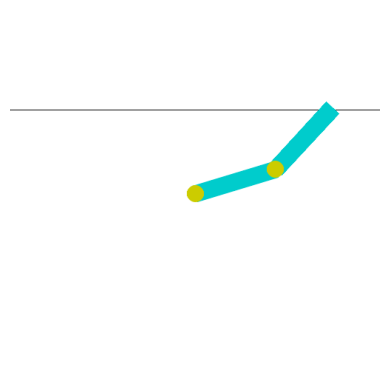

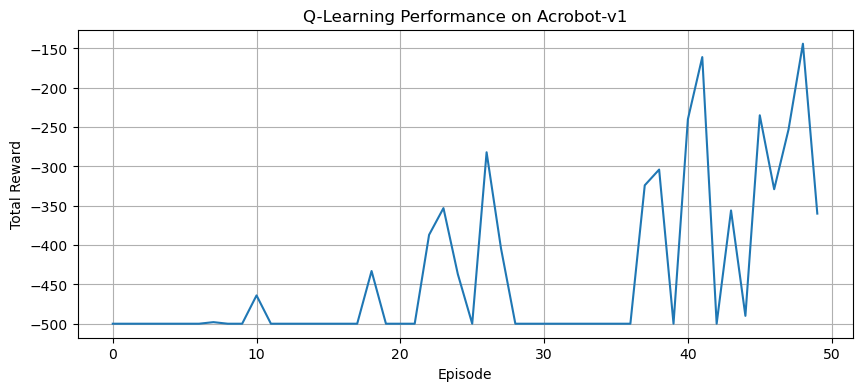

In [19]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import random

# Random seed for different behavior on each run
seed = int(time.time()) % (2**32)
np.random.seed(seed)
random.seed(seed)

# Create Acrobot environment
env = gym.make("Acrobot-v1", render_mode="rgb_array")

# Discretization bins
n_bins = [6] * env.observation_space.shape[0]
obs_low = env.observation_space.low
obs_high = env.observation_space.high
bins = [np.linspace(obs_low[i], obs_high[i], n_bins[i] - 1) for i in range(len(n_bins))]

def discretize(obs):
    return tuple(int(np.digitize(obs[i], bins[i])) for i in range(len(obs)))

# Q-table setup
q_shape = [len(b) + 1 for b in bins] + [env.action_space.n]
q_table = np.random.uniform(low=-1, high=1, size=q_shape)

# Hyperparameters
alpha = 0.1
gamma = 0.99
epsilon = np.random.uniform(0.4, 0.9)
epsilon_min = 0.01
epsilon_decay = 0.92
episodes = 50
max_steps = 500

rewards = []

for episode in range(episodes):
    obs, _ = env.reset(seed=random.randint(0, 9999))
    state = discretize(obs)
    total_reward = 0

    for step in range(max_steps):
        # Choose action
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_obs, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize(next_obs)

        # Q-learning update
        q_table[state][action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state][action]
        )

        state = next_state
        total_reward += reward

        # Render last episode
        if episode == episodes - 1 and step % 20 == 0:
            frame = env.render()
            plt.imshow(frame)
            plt.axis("off")
            clear_output(wait=True)
            plt.show()

        if terminated or truncated:
            break

    rewards.append(total_reward)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

env.close()

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(rewards)
plt.title("Q-Learning Performance on Acrobot-v1")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()